<a href="https://colab.research.google.com/github/t1masavin/my_resume/blob/master/leak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import imageio
import json
import PIL.Image,PIL.ImageDraw
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files, drive
import json
import pandas as pd
import base64
import io

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dec_cls = {5 : 'staphylococcus_epidermidis', 4 : 'klebsiella_pneumoniae', 
          3 : 'staphylococcus_aureus' , 2 :  'moraxella_catarrhalis' , 
          1 : 'c_kefir', 0 : 'ent_cloacae' }
CLASSES ={'staphylococcus_epidermidis' : np.array([0,0,0,0,0,1]), 'klebsiella_pneumoniae' : np.array([0,0,0,0,1,0]), 
          'staphylococcus_aureus' : np.array([0,0,0,1,0,0]), 'moraxella_catarrhalis' : np.array([0,0,1,0,0,0]), 
          'c_kefir' : np.array([0,1,0,0,0,0]), 'ent_cloacae' : np.array([1,0,0,0,0,0])}

In [ ]:
sol_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/bacteria (1).csv')

In [ ]:
sol_df.iloc[106]

id                                                                         107
class                                                              ent_cloacae
base64 encoded PNG (mask)    iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAA...
Name: 106, dtype: object

In [ ]:
for i in range(0,107):
    print(i)
    pth = '/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/leak/' + sol_df.iloc[i,1] + '/'+ str(i).zfill(4) + '.png'
    img_data = base64.b64decode(sol_df.iloc[i,2].replace("\n","").encode('ascii', errors='ignore'))
    # print(img_data)
    # with open(pth, "wb") as fh:
    #     fh.write(img_data)
    img_data = Image.open(io.BytesIO(img_data))
    img_data.save(pth, 'png')


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img_name = '/content/drive/My Drive/Colab Notebooks/olymp/LAPLACIAN/leak/moraxella_catarrhalis/0057.png'
img = cv2.UMat(cv2.imread(img_name, cv2.IMREAD_COLOR))
img = cv2.UMat.get(img)

In [ ]:
img_name_pr = '/content/drive/My Drive/Colab Notebooks/olymp/pred_masks/058.png'
img_pr = cv2.UMat(cv2.imread(img_name_pr, cv2.IMREAD_COLOR))
img_pr = cv2.UMat.get(img_pr)

In [ ]:
img.transpose(1,0,2).shape

(640, 512, 3)

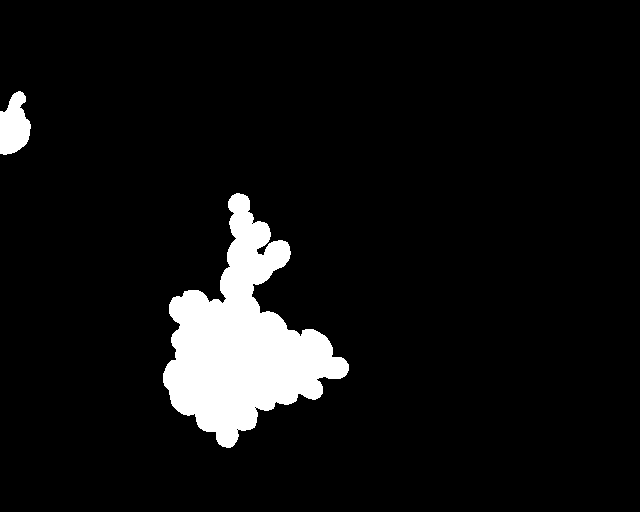

In [ ]:
cv2_imshow(img)

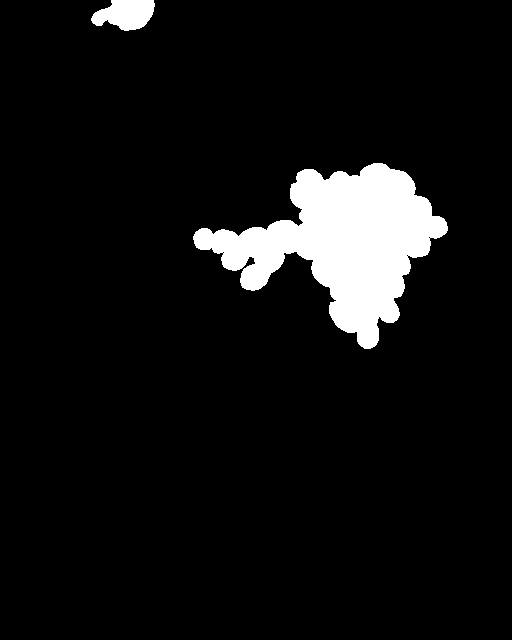

In [ ]:
img_tr = img.transpose(1,0,2)
cv2_imshow(img_tr)

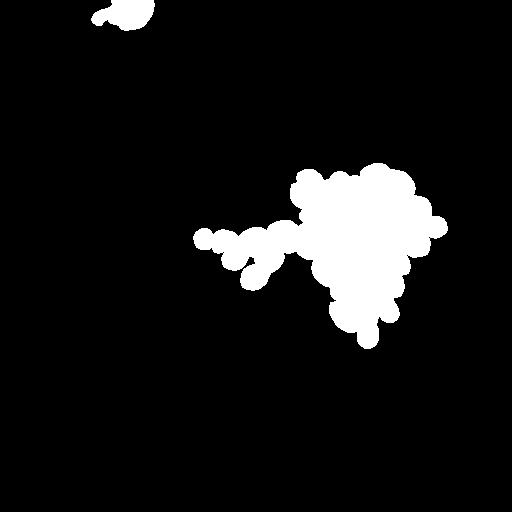

In [ ]:
cv2_imshow(img_tr[:512,:,:])

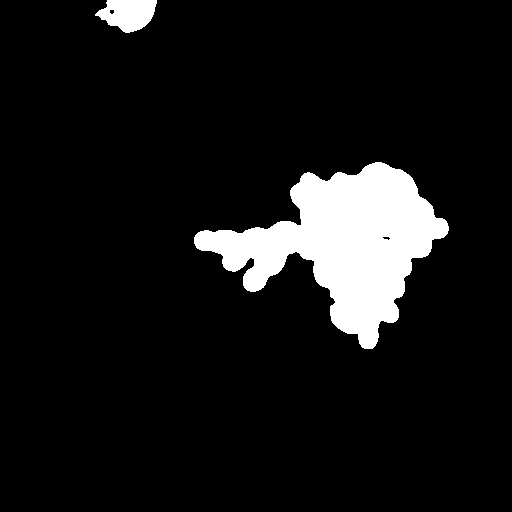

In [ ]:
cv2_imshow(img_pr[:,:512,:])

In [ ]:
zeros = np.zeros_like(img_pr[:,:512,:])

In [ ]:
zeros[:,:,0] = img_pr[:,:512,0]
zeros[:,:,1] = img_tr[:512,:,0]

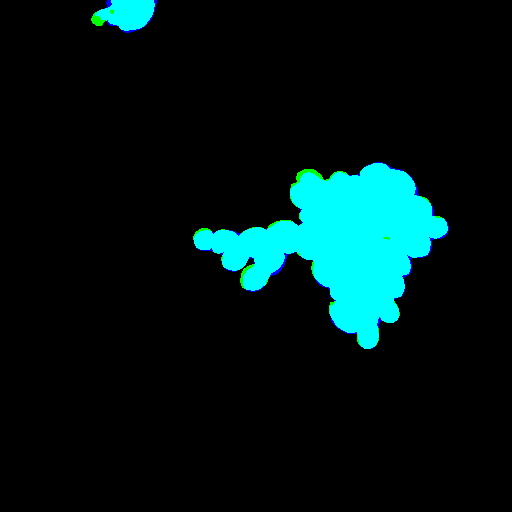

In [ ]:
cv2_imshow(zeros)